# Python Libraries

In [ ]:
import scipy.stats as stats
import numpy as np
import pandas as pd

import statsmodels.api as sm
import matplotlib.pyplot as plt

## Dataset

In [ ]:

# Load data from a CSV file
file_path = './cereals.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head()

,NAME,MANUF,TYPE,CALORIES,PROTEIN,FAT,SODIUM,FIBER,CARBO,SUGARS,POTASS,VITAMINS,SHELF,WEIGHT,CUPS,RATING
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


# Q1



### **Define the Hypothesis:**
- Null Hypothesis (H0): The observed distribution of preferences for different cereal flavors is the same as the expected distribution.

- Alternative Hypothesis (H1): The observed distribution of preferences for different cereal flavors is different from the expected distribution.

### Perform the Chi-Square Test:


In [ ]:
# Observed frequencies
observed = np.array([50, 30, 60, 40])

# Expected frequencies (total customers = sum of observed)
total_customers = np.sum(observed)
expected = total_customers * np.array([0.25, 0.25, 0.25, 0.25])

# Perform Chi-Square test
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Degrees of freedom
df = len(observed) - 1

# Print the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis (H0).")
    print("There is no significant difference between the observed and expected distributions.")
else:
    print("Reject the null hypothesis (H0).")
    print("There is a significant difference between the observed and expected distributions.")
#print(chi2_stat, p_value, df)

Chi-Square Statistic: 11.11111111111111
P-Value: 0.011139980641667716
Reject the null hypothesis (H0).
There is a significant difference between the observed and expected distributions.


### **Interpretation:**
Significance Level (α = 0.05): The threshold to determine statistical significance.

**p-value (0.0111) < α (0.05):** We reject the null hypothesis. This means that the observed distribution is different from the expected distribution.

**Final Conclusion:**
Given a significance level of α = 0.05, the observed distribution of preferences for the different cereal flavors among customers differs significantly from the expected distribution.

# Q2

### 1. Define the Hypotheses for the T-test

- **Null Hypothesis (H₀):** The mean ratings of the cereals for the two packaging methods are equal.
  
  $H_0: \mu_1 = \mu_2$
  

- **Alternative Hypothesis (H₁):** The mean ratings of the cereals for the two packaging methods are not equal.
  
  $H_1: \mu_1 \not = \mu_2$


### 2. Perform the T-test and Interpret the Results

In [ ]:
# Sample data
type1 = np.array([80, 85, 82, 90, 78, 88, 83, 86, 79, 81, 84, 87, 85, 89, 82, 86, 84, 88, 90, 85])
type2 = np.array([75, 80, 78, 76, 82, 81, 77, 79, 74, 80, 78, 82, 76, 80, 78, 81, 79, 83, 75, 78])

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(type1, type2)

# Print the result
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value:.8f}")

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis (H0).")
    print("There is no significant difference between the mean ratings of the two packaging methods.")
else:
    print("Reject the null hypothesis (H0).")
    print("There is a significant difference between the mean ratings of the two packaging methods.")

T-statistic: 6.150760799045891
P-value: 0.00000035
Reject the null hypothesis (H0).
There is a significant difference between the mean ratings of the two packaging methods.


### 3. Interpretation with Significance Level α = 0.05

- **p-value (0.00000035) < α (0.05):**
We reject the null hypothesis. This means  that there is a significant difference between the mean ratings of the two packaging methods.

### Final Interpretation
Since the p-value is extreamly small, we reject the null hypothesis with higher level of confidence.

# Q3

In [ ]:
data.columns

Index(['NAME', 'MANUF', 'TYPE', 'CALORIES', 'PROTEIN', 'FAT', 'SODIUM',
       'FIBER', 'CARBO', 'SUGARS', 'POTASS', 'VITAMINS', 'SHELF', 'WEIGHT',
       'CUPS', 'RATING'],
      dtype='object')

In [ ]:
# Define the predictor and response variables for simple regression
X_simple = data['FIBER']
X_simple = sm.add_constant(X_simple)
y = data['RATING']

# Fit the simple regression model
simple_model = sm.OLS(y, X_simple).fit()

# Predict the values for the simple regression model
y_pred_simple = simple_model.predict(X_simple)

# Calculate MSE and RMSE for the simple regression model
mse_simple = np.mean((y - y_pred_simple) ** 2)
rmse_simple = np.sqrt(mse_simple)

# Print the summary of the regression model
print(simple_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 RATING   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     38.85
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           2.45e-08
Time:                        10:51:28   Log-Likelihood:                -296.15
No. Observations:                  77   AIC:                             596.3
Df Residuals:                      75   BIC:                             601.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.2566      1.767     19.948      0.0

In [ ]:
# 1. Estimated Regression Equation
intercept = simple_model.params['const']
slope = simple_model.params['FIBER']
print(f"Estimated Regression Equation: Y = {intercept:.2f} + {slope:.2f} * X")

# 2. Estimated Rating for 3 Grams of Fiber
fiber_content = 3
predicted_rating = simple_model.predict([1, fiber_content])  # [1, fiber_content] for intercept and slope
print(f"Estimated Rating for {fiber_content} grams of fiber: {predicted_rating[0]:.2f}")

# 3. 95% Confidence Interval for True Mean Rating at 3 grams of fiber
# Calculate the standard error of the prediction
predictions = simple_model.get_prediction([1, fiber_content])
summary_frame = predictions.summary_frame(alpha=0.05)  # 95% CI

print(f"95% Confidence Interval for the true mean rating at {fiber_content} grams of fiber: "
      f"({summary_frame['obs_ci_lower'][0]:.2f}, {summary_frame['obs_ci_upper'][0]:.2f})")

# 4. Meaning of 3 in the Regression Equation
# The slope indicates how much the rating increases for each additional gram of fiber.
print(f"The slope ({slope:.2f}) indicates that for each additional gram of fiber, "
      f"the rating is expected to increase by {slope:.2f} units.")


Estimated Regression Equation: Y = 35.26 + 3.44 * X
Estimated Rating for 3 grams of fiber: 45.59
95% Confidence Interval for the true mean rating at 3 grams of fiber: (22.56, 68.62)
The slope (3.44) indicates that for each additional gram of fiber, the rating is expected to increase by 3.44 units.


### Summary
- Estimated Regression Equation: This equation helps predict the rating of cereals based on their fiber content.

- Slope and Intercept: The slope indicates how much the rating changes with each gram of fiber, while the intercept is the rating when fiber content is zero.

- Estimated Rating for 3 Grams of Fiber: This is the predicted rating for cereals with 3 grams of fiber.

- 95% Confidence Interval: This interval gives a range within which we can be 95% confident that the true mean rating for cereals with 3 grams of fiber lies.

- Meaning of 3: It is the specific value of fiber content used in the regression equation to make predictions.

# Q4

- Model Accuracy: The R-squared value gives an indication of how well the model explains the variability in the ratings.

  $R^2$ (R Squared): <br>
  $R^2 = 1- \frac{SS_{Regression}}{SS_{Total}}$

  MSE (Mean Squared Error):
  $
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $

  RMSE (Root Mean Squared Error):
  $
  \text{RMSE} = \sqrt{\text{MSE}}
  $

- 95% Prediction Interval: The interval is derived using the summary_frame method, also corrected with iloc to access values by position.

- Plot: A scatter plot of the data points along with the regression line is created to visualize the relationship between fiber content and rating.

R-squared: 0.34
95% Prediction Interval for a cereal with 3 grams of fiber: (22.56, 68.62)


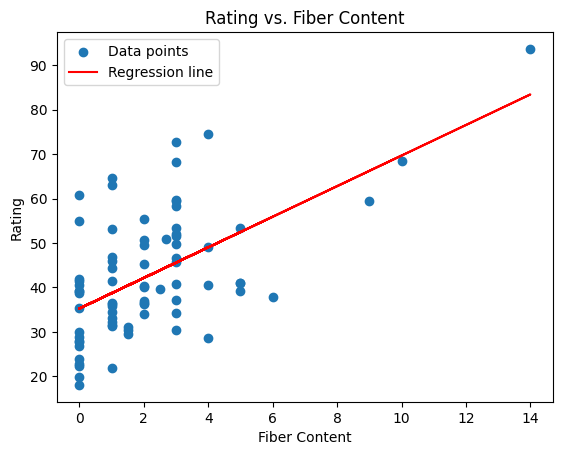

In [ ]:
# Estimate the prediction error and evaluate model accuracy using R-squared
r_squared = simple_model.rsquared
print(f"R-squared: {r_squared:.2f}")

# Create a 95% prediction interval for a cereal with a fiber content of 3 grams
pred_int = summary_frame.loc[:, ['obs_ci_lower', 'obs_ci_upper']]
print(f"95% Prediction Interval for a cereal with 3 grams of fiber: ({pred_int.iloc[0, 0]:.2f}, {pred_int.iloc[0, 1]:.2f})")

# Plot the rating against fiber content
plt.scatter(data['FIBER'], data['RATING'], label='Data points')
plt.plot(data['FIBER'], intercept + slope * data['FIBER'], color='red', label='Regression line')
plt.xlabel('Fiber Content')
plt.ylabel('Rating')
plt.title('Rating vs. Fiber Content')
plt.legend()
plt.show()

# Q5

In [ ]:
# Define the predictor and response variables
X = data[['FIBER', 'SUGARS']]
y = data['RATING']

# Add a constant to the predictor (intercept)
X = sm.add_constant(X)

# Fit the multiple regression model
multiple_model = sm.OLS(y, X).fit()

# Predict the values for the multiple regression model
y_pred_multiple = multiple_model.predict(X)

# Print the regression summary
print(multiple_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 RATING   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     156.9
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           2.43e-27
Time:                        10:52:05   Log-Likelihood:                -248.45
No. Observations:                  77   AIC:                             502.9
Df Residuals:                      74   BIC:                             509.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.6097      1.546     33.376      0.0

As you can see in the multiple regression report, R-squared of multiple regression is **0.809**. However R-squared of simple regression was 0.34. It means that, multiple regression model fits on the data points better than simple model, same as our expectation.

In [ ]:
# Extract the coefficients
intercept, fiber_coef, sugars_coef = multiple_model.params

intercept, fiber_coef, sugars_coef

(51.6096561036772, 2.867922886488777, -2.1836755314715472)

### Explanation of Fiber Coefficient ($𝛽_{fiber}$):
This value indicates the change in the rating for each one-unit increase in fiber content, holding the amount of sugars constant.

In [ ]:
# Predict the values for the simple regression model
y_pred_simple = simple_model.predict(X_simple)

# Calculate MSE and RMSE for the simple regression model
mse_simple = np.mean((y - y_pred_simple) ** 2)
rmse_simple = np.sqrt(mse_simple)
# Calculate MSE and RMSE for the multiple regression model
mse_multiple = np.mean((y - y_pred_multiple) ** 2)
rmse_multiple = np.sqrt(mse_multiple)

# Print the results
print(f"MSE (Simple Regression): {mse_simple:.2f}")
print(f"RMSE (Simple Regression): {rmse_simple:.2f}")
print(f"MSE (Multiple Regression): {mse_multiple:.2f}")
print(f"RMSE (Multiple Regression): {rmse_multiple:.2f}")

MSE (Simple Regression): 128.30
RMSE (Simple Regression): 11.33
MSE (Multiple Regression): 37.17
RMSE (Multiple Regression): 6.10


Same as our expectation, error in second model is smaller than first model because second one considers 2 predictors (fiber & sugar) so it's reasonable to decrease MSE.

In [ ]:
# Extract the standard errors (s)
s_simple = simple_model.mse_resid ** 0.5
s_multiple = multiple_model.mse_resid ** 0.5

print(f"Standard Error (Simple Regression): {s_simple:.2f}")
print(f"Standard Error (Multiple Regression): {s_multiple:.2f}")

Standard Error (Simple Regression): 11.48
Standard Error (Multiple Regression): 6.22


### Visualization

<ipython-input-17-7fa2a1600bca>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rating_mesh = multiple_model.params[0] + multiple_model.params[1] * fiber_mesh + multiple_model.params[2] * sugars_mesh


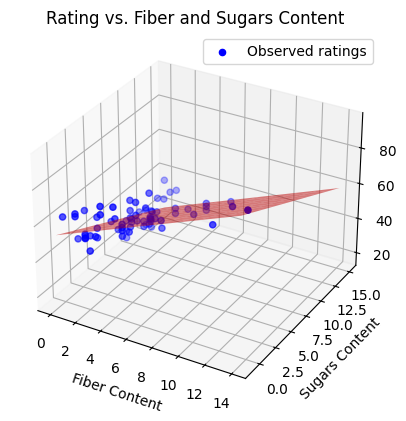

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Plot the data points and regression plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the observed ratings
ax.scatter(data['FIBER'], data['SUGARS'], data['RATING'], label='Observed ratings', c='b')

# Create a mesh grid for plotting the regression plane
fiber_range = np.linspace(data['FIBER'].min(), data['FIBER'].max(), 10)
sugars_range = np.linspace(data['SUGARS'].min(), data['SUGARS'].max(), 10)
fiber_mesh, sugars_mesh = np.meshgrid(fiber_range, sugars_range)
rating_mesh = multiple_model.params[0] + multiple_model.params[1] * fiber_mesh + multiple_model.params[2] * sugars_mesh

# Plot the regression plane
ax.plot_surface(fiber_mesh, sugars_mesh, rating_mesh, color='r', alpha=0.5)

# Labels and title
ax.set_xlabel('Fiber Content')
ax.set_ylabel('Sugars Content')
ax.set_zlabel('Rating')
ax.set_title('Rating vs. Fiber and Sugars Content')
ax.legend()

plt.show()
